<a href="https://colab.research.google.com/github/LatifahNursyabanu/Grafika-Komputer/blob/main/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT PACKAGE

In [8]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter

LOAD IMAGE

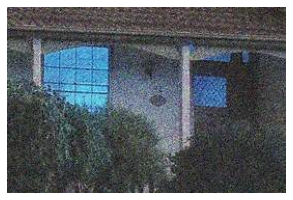

In [9]:
img = cv2.imread('/content/th.jfif') # u can replace with ur own image path, its also can filled by link github or drive 
plt.figure(figsize = (5,5))
plt.imshow(img)
plt.axis('off')
plt.show()

#CONVOLUTION

Konvolusi pada citra didefinisikan sebagai proses untuk memperoleh suatu piksel didasarkan pada nilai piksel dan tetangganya, dengan melibatkan suatu matriks yang disebut kernel yang merepresentasikan pembobotan. Wujud kernel umumnya bujur sangkar, tetapi dapat pula berbentuk persegi panjang.

Rumus konvolusi 2D yang banyak digunakan pada pengolahan citra digital sangat sulit diimplementasikan menggunakan komputer, karena pada dasarnya komputer hanya bisa melakukan perhitungan pada data diskrit sehingga tidak dapat digunakan untuk menghitung integral. Maka Teori konvolusi terbagi 2, yaitu Fungsi Diskrit dan Fungsi Kontinu.
Berikut kami mendefinisikan Fungsi Diskrit Konvolusi 

In [10]:
def conv(X,F):
  X_height = X.shape[0]
  X_width = X.shape[1]

  F_height = F.shape[0]
  F_width = F.shape[1]
  
  H = (F_height) // 2
  W = (F_width) // 2

  out = np.zeros((X_height, X_width))
  for i in np.arange(H+1, X_height - H):
    for j in np.arange(W+1, X_width - W):
      sum = 0
      for k in np.arange(-H, H+1):
        for l in np.arange(-W, W+1):
          a = X[i+k, j+l]
          b = F[H+k, W+l]
          sum += (b*a)
        out[i,j] = sum
  return out

Sifat Konvolusi
1. Komutatif
2. Asosiatif
3. Homogeneous
4. Distributif
5. Shift-Invariant

Konvulusi berfungsi dalam Image Filtering

#IMAGE FILTERING


Image Filtering merupakan salah satu teknik pengolahan citra sederhana yang menggunakan prinsip dimana setiap piksel pada sebuah citra dianggap sebagai entitas sebuah matriks. Selanjutnya, operasi konvolusi dilakukan pada matriks tersebut untuk memperoleh atau menguatkan fitur tertentu yang ada pada citra tersebut. Operasi Image Filtering sering digunakan sebagai langkah awal dalam pengolahan (pre-processing) citra, misalnya untuk menghilangkan noise atau memperkuat fitur dengan ciri tertentu pada citra.

Terdapat 3 macam filter citra berdasarkan frekuensi, yaitu: 
1. Low pass filter : yaitu filter yang melewatkan atau mengambil komponen berfrekuensi rendah dan menekan atau membuang komponen dengan frekuensi tinggi. Low pass filter digunakan untuk menghilangkan noise dan blurring pada citra. 
2. High pass filter : yaitu filter yang melewatkan atau mengambil komponen berfrekuensi tinggi dan menekan atau membuang frekuensi rendah. High pass filter digunakan untuk deteksi tepi dan penajaman citra. 
3. Band stop filter adalah filter yang mengambil atau melewatkan komponen frekuensi tinggi dan frekuensi rendah serta menekan komponen frekuensi rentang tertentu (frekuensi menengah). Band stop filter digunakan untuk kompresi dan restorasi citra.

#MEAN FILTERING
with kernel np.ones 3x3

Mean Filtering merupakan salah satu bentuk LOW-PASS FILTER dimana memiliki kernel yang semua entitasnya bernilai positif. Mean Filtering menghasilkan citra yang lebih sedikit noise tetapi menimbulkan blurring.

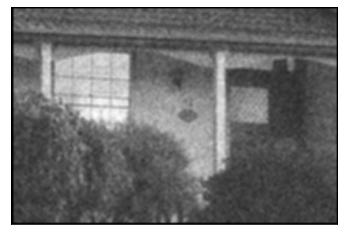

In [11]:
img = cv2.imread('/content/th.jfif')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
mean = (1.0 / 9) * np.array(
    [[1,1,1],
     [1,1,1],
     [1,1,1]])

img_out = conv(img,mean)
plt.imshow(img_out, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([], plt.yticks([]))
plt.show()

#GAUSSIAN FILTER
with gaussian kernel

Kernel mewakili pendekatan diskrit dari distribusi Gaussian. Gaussian kernel memiliki entitas yang bisa bernilai negatif maupun positif sehingga hasil penjumlahan entitas bernilai 0 atau 1. Sama seperti Mean Filtering, Gaussian filter mereduksi noise namun lebih baik dengan tetap mempertahankan tepi.

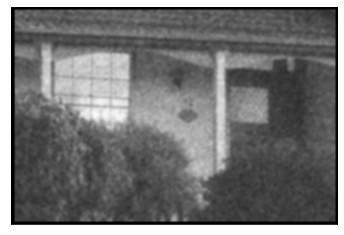

In [12]:
img = cv2.imread('/content/th.jfif')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
Gaus = (1.0 / 345) * np.array(
    [[1,5,7,5,1],
     [5,20,33,20,5],
     [7,33,55,33,7],
     [5,20,33,20,5],
     [1,5,7,5,1]])
img_out = conv(img,Gaus)
plt.imshow(img_out, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([], plt.yticks([]))
plt.show()

#OTHER FILTER

LAPLACE FILTER

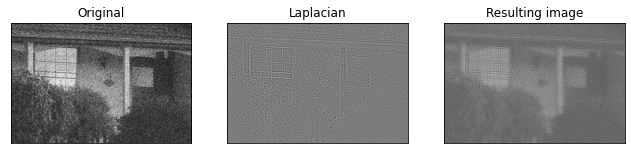

In [13]:
new_image = cv2.Laplacian(img,cv2.CV_64F)

plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img + new_image, cmap='gray'),plt.title('Resulting image')
plt.xticks([]), plt.yticks([])
plt.show()

UNSHARP FILTER

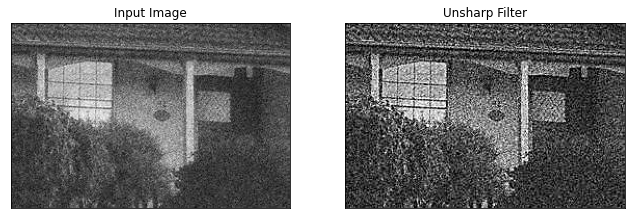

In [14]:
image2 = Image.fromarray(img.astype('uint8'))
new_image = image2.filter(ImageFilter.UnsharpMask(radius=2, percent=150))

plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()

FREQUENCY FILTER

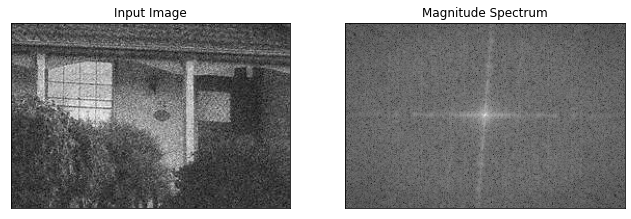

In [15]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)

# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)

# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

LOW-PASS FILTER

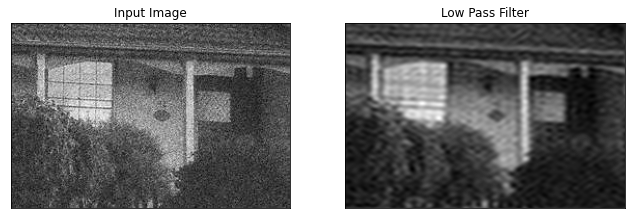

In [16]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()

# THANKS, WISHING IT COULD BE HELPFULL FOR YOU ^^
kindly check my social media to get know more and keep connected!:)

Instagram : @nurban10

LinkedIn  : https://www.linkedin.com/in/latifah-nursya-banu